# Outliers Removal Using Z - Scope
- The Z-Score method is one of the simplest statistical methods for detecting outliers in a dataset. 
- It measures how many standard deviations a data point is from the mean. Outliers are identified based on a threshold value (e.g. ∣Z∣>3).



### Formula for Z-Score
- Z= (X−μ)/σ
---
​Where:
- Z: Z-score (standard score)
- X: Data point value
- μ: Mean of the data
- σ: Standard deviation of the data

- A commonly used threshold is ∣Z∣>3, meaning any point more than 3 standard deviations away from the mean is considered an outlier.

##### Steps to Detect Outliers Using Z-Score in Python On Sample Created Data

In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create a Data Set
data = { "Value" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 70, 100] }
df = pd.DataFrame(data)
df['Value']

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     70
11    100
Name: Value, dtype: int64

In [12]:
# Calculate the mean and standard deviation
mean = df['Value'].mean()
std_dev = df['Value'].std()

# Calculate the z-scores
df['Z-Score'] = (df['Value'] - mean)/std_dev
df

,Value,Z-Score
0,1,-0.559622
1,2,-0.528094
2,3,-0.496566
3,4,-0.465038
4,5,-0.433510
5,6,-0.401982
6,7,-0.370454
7,8,-0.338926
8,9,-0.307398
9,10,-0.275870


In [ ]:
# Identify the outliers by checking if the absolute z-score is greater than 3(common threshold Value)
threshold = 2.5 
df['Outliers'] = df['Z-Score'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')
df

,Value,Z-Score,Outliers
0,1,-0.559622,No
1,2,-0.528094,No
2,3,-0.496566,No
3,4,-0.465038,No
4,5,-0.433510,No
5,6,-0.401982,No
6,7,-0.370454,No
7,8,-0.338926,No
8,9,-0.307398,No
9,10,-0.275870,No


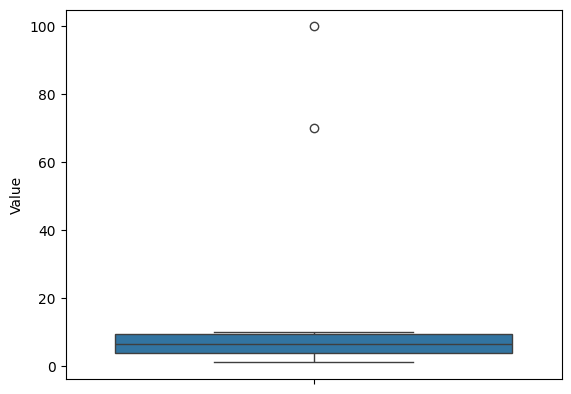

In [40]:
sns.boxplot(df['Value'])
plt.show()

In [26]:
# Keep only rows where Z-Score is within threshold
df_clean = df[df['Z-Score'].abs() < threshold].drop(columns='Z-Score')
df_clean

,Value,Outliers
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No
5,6,No
6,7,No
7,8,No
8,9,No
9,10,No


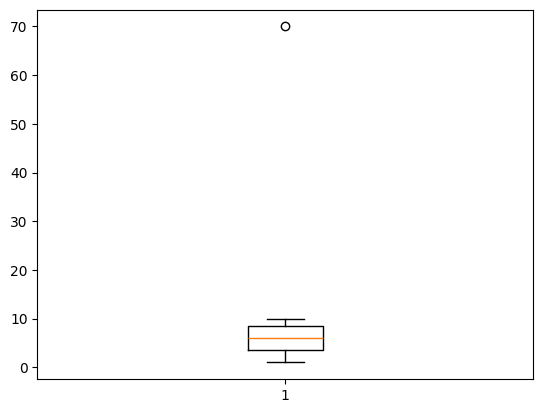

In [30]:
plt.boxplot(df_clean['Value'])
plt.show()

### On Large DataSet 

In [33]:
ds = pd.read_csv('Sales_data.csv')
ds.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [36]:
ds.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


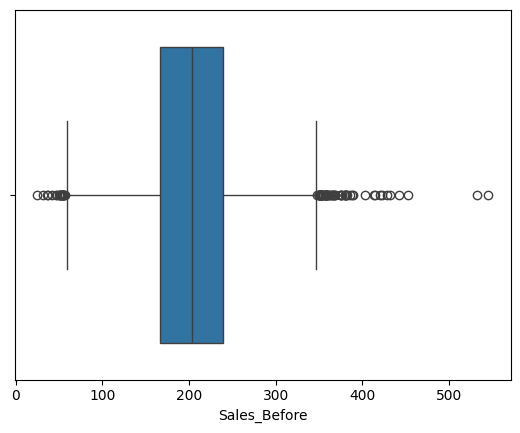

In [42]:
sns.boxplot(x ='Sales_Before', data=ds)
plt.show()

In [44]:
mean_sales = ds['Sales_Before'].mean()
std_sales = ds['Sales_Before'].std()
mean_sales, std_sales

(np.float64(203.71699822858852), np.float64(55.2730586167698))

In [47]:
ds['Z-Score'] = (ds['Sales_Before'] - mean_sales) / std_sales
ds

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made,Z-Score
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No,0.666353
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes,0.780581
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No,-0.845600
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes,-0.209691
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes,0.469824
...,...,...,...,...,...,...,...,...
9995,Treatment,NaN,259.695935,415.181694,88.438776,98.418593,NaN,1.012771
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,NaN,-0.311702
9997,Treatment,Low Value,208.107142,322.893351,55.915870,NaN,No,0.079426
9998,Treatment,Medium Value,NaN,431.974901,66.082462,81.274030,No,NaN


In [86]:
# Set Z-score threshold (commonly 3 or -3)
threshold = 3   # Can modify this threshold based on your needs as 2.5 removed all the outliers at omce

# Keep only rows where Z-Score is within threshold
ds_clean = ds[ds['Z-Score'].abs() < threshold].drop(columns='Z-Score')
ds_clean

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,NaN,163.289805,248.916244,72.235869,91.898914,No
9994,NaN,Low Value,113.736701,177.749874,59.819753,NaN,Yes
9995,Treatment,NaN,259.695935,415.181694,88.438776,98.418593,NaN
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,NaN


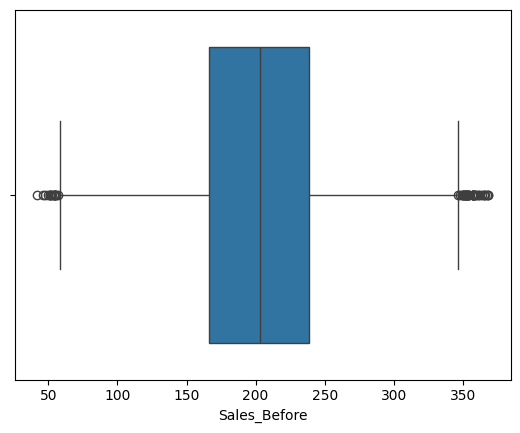

In [85]:
sns.boxplot(x ='Sales_Before', data=ds_clean)
plt.show()

#### Normal Method To Remove The Outliers

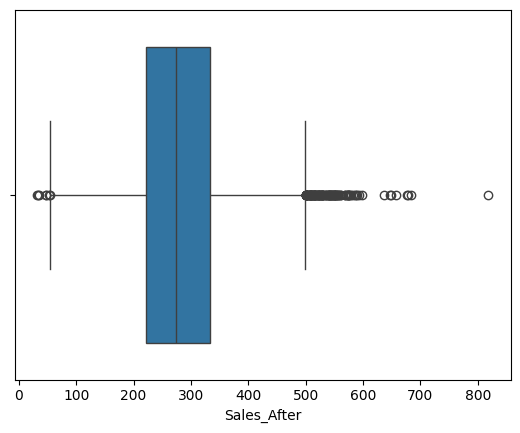

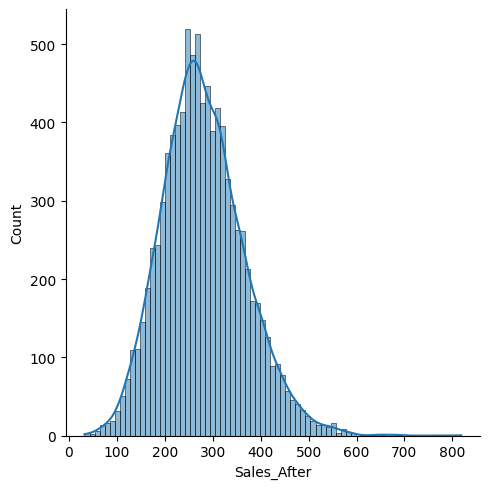

In [75]:
sns.boxplot(x ='Sales_After', data=ds)
plt.show()
sns.displot(x ='Sales_After', data=ds, kde=True)
plt.show()

In [70]:
# Using the Formula to find the min and max range of Sales_After
min_range = ds['Sales_After'].mean() - (3 * ds['Sales_After'].std())
max_range = ds['Sales_After'].mean() + (3 * ds['Sales_After'].std())
min_range, max_range

(np.float64(23.47932320004975), np.float64(537.4365812130418))

In [ ]:
# Saving the filtered dataset into a new DataFrame
ds_1 = ds[ds['Sales_After'] < max_range]

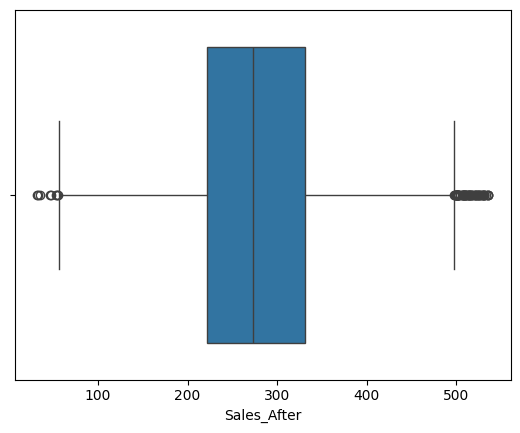

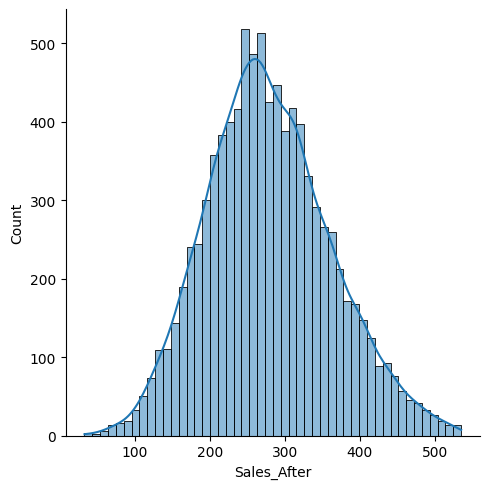

In [ ]:
# Checking if the new data set has outliers or they are being removed
sns.boxplot(x ='Sales_After', data=ds_1)
plt.show()
sns.displot(x ='Sales_After', data=ds_1, kde=True)
plt.show()